<a href="https://colab.research.google.com/github/luctiz/Grupo43-TP1/blob/master/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **-- - Dependencias**

In [1]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install geopandas

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
     - 189.2MB 140.6MB/s
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756023 sha256=8b3457ddacae468059dd24f5cf864a9fe80dece5818f4bbe58ff162cbca9c0d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-55izmi3_/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gdp
from shapely.geometry import Point, Polygon
import folium,json
from mpl_toolkits.basemap import Basemap

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **00 - Validación de Datos**

In [0]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/train.csv', dtype = {'piscina':'int32', 'gimnasio':'int32', 'usosmultiples':'int32', 'escuelascercanas':'int32',
                                         'centroscomercialescercanos':'int32', 'precio':'int32', 'id':'int32'},parse_dates = ['fecha'])

In [0]:
#Quito todos los NaN y los pasa a valor 0
df = df.replace(np.nan, 0)

In [0]:
#Continuar casteando valores que ocupan demasiada memoria (ahora puedo hacerlo en aquellos que tenian NaN)
df = df.astype({'banos':'int32', 'antiguedad':'int32', 'garages':'int32', 'habitaciones':'int32', 'metroscubiertos':'int32', 'metrostotales':'int32',
                    'idzona':'int32'})

In [0]:
#Establecer como category el tipo de propiedad
categorias = df['tipodepropiedad']
categorias = categorias.astype('category').dtypes
df = df.astype({'tipodepropiedad':'category'})

In [7]:
print('Numero de columnas',df.shape)

Numero de columnas (240000, 23)


In [8]:
print('Numero de filas por columnas',df.size)

Numero de filas por columnas 5520000


In [9]:
print('Numero de Elementos',df.count())

Numero de Elementos id                            240000
titulo                        240000
descripcion                   240000
tipodepropiedad               240000
direccion                     240000
ciudad                        240000
provincia                     240000
antiguedad                    240000
habitaciones                  240000
garages                       240000
banos                         240000
metroscubiertos               240000
metrostotales                 240000
idzona                        240000
lat                           240000
lng                           240000
fecha                         240000
gimnasio                      240000
usosmultiples                 240000
piscina                       240000
escuelascercanas              240000
centroscomercialescercanos    240000
precio                        240000
dtype: int64


In [10]:
print('Analisis de tipos',df.dtypes)

Analisis de tipos id                                     int32
titulo                                object
descripcion                           object
tipodepropiedad                     category
direccion                             object
ciudad                                object
provincia                             object
antiguedad                             int32
habitaciones                           int32
garages                                int32
banos                                  int32
metroscubiertos                        int32
metrostotales                          int32
idzona                                 int32
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                               int32
usosmultiples                          int32
piscina                                int32
escuelascercanas                       int32
centroscomercialescercanos           

In [11]:
#Se redujo el uso de memoria de 45MB a 27MB aproximadamente
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int32
titulo                        240000 non-null object
descripcion                   240000 non-null object
tipodepropiedad               240000 non-null category
direccion                     240000 non-null object
ciudad                        240000 non-null object
provincia                     240000 non-null object
antiguedad                    240000 non-null int32
habitaciones                  240000 non-null int32
garages                       240000 non-null int32
banos                         240000 non-null int32
metroscubiertos               240000 non-null int32
metrostotales                 240000 non-null int32
idzona                        240000 non-null int32
lat                           240000 non-null float64
lng                           240000 non-null float64
fecha                         240000 non-null

# **01 - Análisis de Tipo de Propiedades**

In [14]:
df['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
0                                    46
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1


In [0]:
result = df.groupby(["tipodepropiedad"])['precio'].aggregate(np.median).reset_index().sort_values('precio')

In [16]:
result.head()

,tipodepropiedad,precio
9,Garage,500000
7,Duplex,668000
15,Lote,702100
21,Terreno,1100000
0,0,1497500


In [0]:
result = result.drop([0],axis=0) #Elimino los tipos 0 que desconozco que clase de propiedad son (NO me sirven para comparar porque puede ser cualquier cosa)

Text(0, 0.5, 'Tipo de Propiedad')

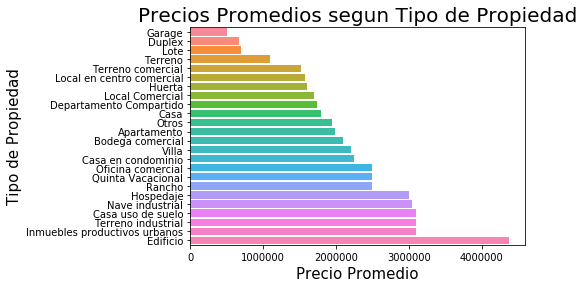

In [18]:
g = sns.barplot( x='precio', y= 'tipodepropiedad', data = result, order=result['tipodepropiedad'], orient = 'h',saturation = 1000)
g.set_title("Precios Promedios segun Tipo de Propiedad", fontsize=20)
g.set_xlabel("Precio Promedio", fontsize=15)
g.set_ylabel("Tipo de Propiedad", fontsize=15)

# **02 - Análisis de Coordenadas**

In [0]:
from matplotlib.colors import Normalize
import matplotlib.colors as colors
from numpy import array
from numpy import max

In [0]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
sns.set(style="white", color_codes=True)

In [0]:
df = df.drop([0],axis=0) #Elimino los tipos 0 que desconozco que clase de propiedad son

In [0]:
# Creamos la lista de latitudes y longitudes.
lats, lons = list(df['lat']), list(df['lng'])

In [0]:
precios = list(df['precio'])

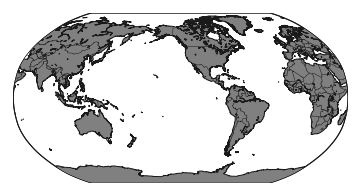

In [39]:
#Creo el mapa
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'grey')
eq_map.drawmapboundary()
plt.show()

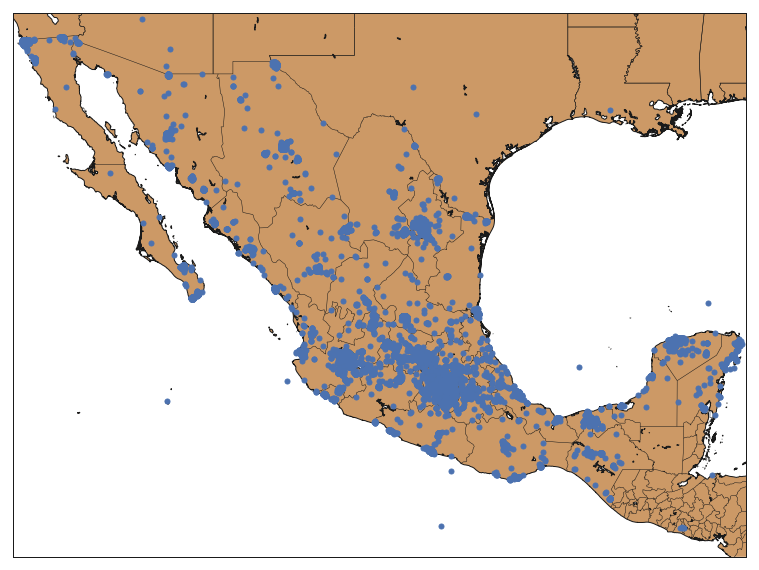

In [55]:
##Analizo sobre Mexico todas las publicaciones
figu, ax = plt.subplots(figsize=(20,10))
eq_map = Basemap(projection='merc',
                  lat_0 = lat, lon_0 = lon,
                  resolution = 'h', area_thresh = 0.1,
                  llcrnrlon=lon-15.5, llcrnrlat=lat-10.5,
                  urcrnrlon=lon+15.5, urcrnrlat=lat+10.5)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = '#cc9966')
eq_map.drawmapboundary()
eq_map.drawstates()

## Coordenadas a posiciones
x,y = eq_map(lons, lats)
eq_map.plot(x, y, 'o', markersize=5)

plt.show()

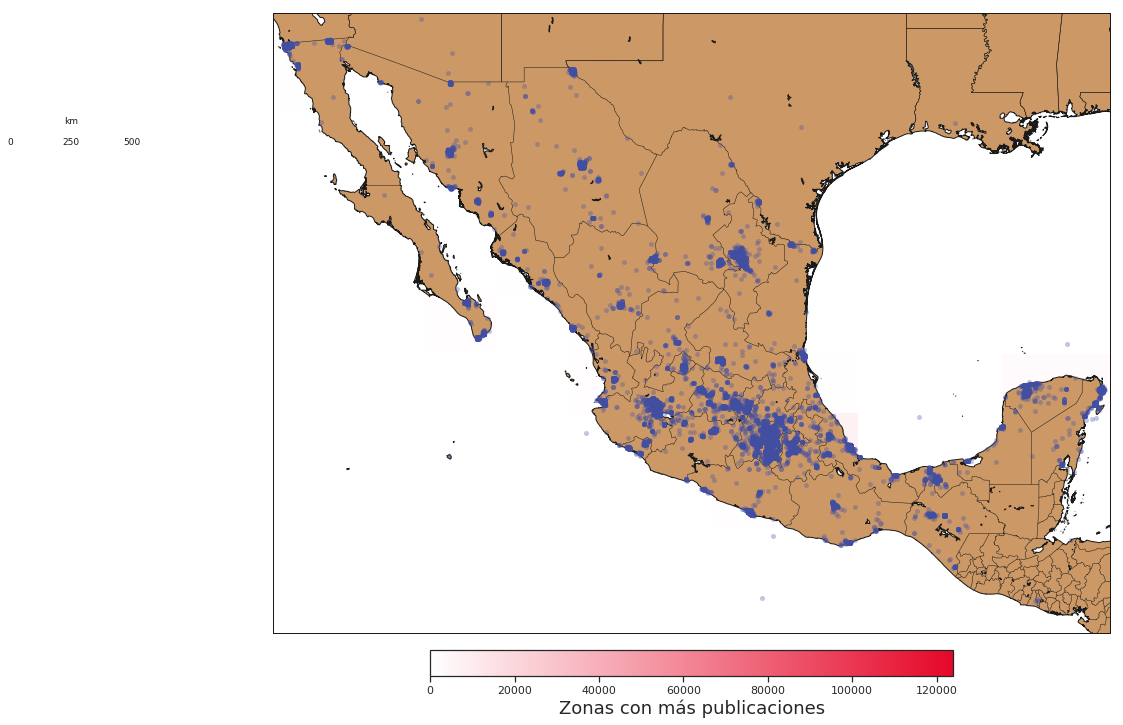

In [66]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm as cmap
# Use orthographic projection centered on California with corners
# defined by number of meters from center position:
m  = Basemap(projection='merc',
                  lat_0 = lat, lon_0 = lon,
                  resolution = 'h', area_thresh = 0.1,
                  llcrnrlon=lon-15.5, llcrnrlat=lat-10.5,
                  urcrnrlon=lon+15.5, urcrnrlat=lat+10.5)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color = '#cc9966')
m.drawmapboundary()


    
# ######################################################################
# bin the epicenters 

# compute appropriate bins to chop up the data:
db = 10 # bin padding
lon_bins = np.linspace(min(lons)-db, max(lons)+db, 100+1) # 10 bins
lat_bins = np.linspace(min(lats)-db, max(lats)+db, 101+1) # 13 bins
    
density, _, _ = np.histogram2d(lats, lons, [lat_bins, lon_bins])

# Turn the lon/lat of the bins into 2 dimensional arrays ready
# for conversion into projected coordinates
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)

# convert the bin mesh to map coordinates:
xs, ys = m(lon_bins_2d, lat_bins_2d) # will be plotted using pcolormesh
# ######################################################################



# define custom colormap, white -> nicered, #E6072A = RGB(0.9,0.03,0.16)
cdict = {'red':  ( (0.0,  1.0,  1.0),
                   (1.0,  0.9,  1.0) ),
         'green':( (0.0,  1.0,  1.0),
                   (1.0,  0.03, 0.0) ),
         'blue': ( (0.0,  1.0,  1.0),
                   (1.0,  0.16, 0.0) ) }
custom_map = LinearSegmentedColormap('custom_map', cdict)
plt.register_cmap(cmap=custom_map)


# add histogram squares and a corresponding colorbar to the map:
plt.pcolormesh(xs, ys, density, cmap="custom_map")

cbar = plt.colorbar(orientation='horizontal', shrink=0.625, aspect=20, fraction=0.2,pad=0.02)
cbar.set_label('Zonas con más publicaciones',size=18)
#plt.clim([0,100])


# translucent blue scatter plot of epicenters above histogram:    
x,y = m(lons, lats)
m.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='#424FA4',markeredgecolor="none", alpha=0.33)
 
    
# http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawmapscale
m.drawmapscale(-119-6, 37-7.2, -119-6, 37-7.2, 500, barstyle='fancy', yoffset=20000)
    
    
# make image bigger:
plt.gcf().set_size_inches(15,15)

plt.show()

In [0]:
# create map
m = Basemap(projection='merc',
                  lat_0 = lat, lon_0 = lon,
                  resolution = 'h', area_thresh = 0.1,
                  llcrnrlon=lon-15.5, llcrnrlat=lat-10.5,
                  urcrnrlon=lon+15.5, urcrnrlat=lat+10.5)
m.drawcoastlines(linewidth=0.25)
lats, lons = list(df['lat']), list(df['lng'])
# create heatmap
heatmap, xedges, yedges = np.histogram2d(lons, lats, bins=25000)

# plot map
##plt.clf()
m.imshow(heatmap.T, interpolation='none', cmap=cmap.jet)
plt.show()